<a href="https://colab.research.google.com/github/Godwin234/python-codes/blob/master/univariate%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prep
import warnings
import random
import itertools
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from __future__ import print_function

%config InlineBackend.figure_format='svg'


In [0]:
learning_rate= 0.05
epoch = 200
global epoch

In [129]:
random.seed(1)
n_samples = 1000
train_x = np.linspace(0,1, n_samples)
y_train = 0.5 * train_x + 2 + np.random.normal(0.00, 50, 1000)

print(y_train)
print(len(train_x))

[-1.16961829e+01 -4.20370851e+00  1.96888722e+01 -9.65970885e+00
 -4.52054548e+01  1.39351463e+01 -8.92428913e+01 -2.44616630e+01
 -2.62249879e+01  3.07034463e+01 -3.66630780e+01 -2.85177651e+01
 -3.28743352e+01  2.56692856e+01 -4.58684404e+01 -1.96867096e+01
  2.38633506e+01  3.39565738e+00 -2.26730824e+01 -9.08404978e+01
 -2.48595710e+01 -4.43023360e+01  6.47095652e+01  2.22944033e+01
  5.63944520e+01  2.26464042e+00 -1.53331684e+02 -3.29713971e+01
  3.65035720e+01  4.03955801e+01  1.35617472e+01 -4.12619385e+01
  3.77184281e+01 -4.15402481e+01 -1.41884817e+01  9.06292707e+00
  6.33828698e+01  5.48144308e+01  5.84360747e+00 -3.14090317e+01
 -5.55467740e+01 -3.09091945e+01 -3.26926311e+01  2.35829930e+01
  1.23425948e+01 -9.99731802e+01  8.29003711e+01  7.93198144e+01
  7.81743257e+01  1.27558715e+02 -6.05973041e+01 -8.16049941e+00
 -6.21700424e+01 -5.45737581e+01  3.74692982e+01  8.51353215e+01
 -4.79917984e+01  1.61652703e+01 -1.38029209e+01  1.63151585e+01
 -3.39202419e+01  2.47011

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
train_x, x_test, y_train, y_test = np.asarray(train_test_split(train_x, y_train, test_size=0.1))
#x_train = x_train.as_matrix().astype("float32")
#y_train = y_train.as_matrix().astype("float32")
print(len(y_train))
print(len(train_x))
print(len(y_test))
print(len(x_test))

900
900
100
100


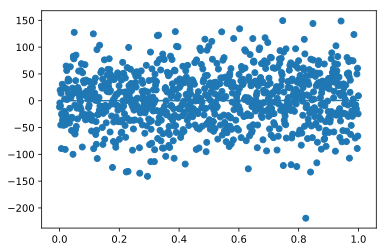

In [131]:
plt.scatter(train_x,y_train,)
plt.plot(train_x,0.5*train_x)
plt.show()

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name  = 'weights')
B = tf.Variable(np.random.randn(), name  = 'bias')

In [0]:
#pred = tf.add(B,(tf.multiply(X,W)))
pred = X * W + B
loss = pred - Y
momentum = 0.0
cost = tf.reduce_sum((loss**2) /(2*(len(train_x))))
optimizer = tf.train.MomentumOptimizer(learning_rate,momentum, True).minimize(cost)#

In [0]:
init = tf.global_variables_initializer()


train error in epoch: 0000 c = 1270.6914 w=1.6155 b=1.7773
train error in epoch: 0020 c = 1270.2950 w=2.1538 b=1.4507
train error in epoch: 0040 c = 1269.9491 w=2.6683 b=1.1653
train error in epoch: 0060 c = 1269.6461 w=3.1529 b=0.9039
train error in epoch: 0080 c = 1269.3811 w=3.6073 b=0.6609
train error in epoch: 0100 c = 1269.1487 w=4.0327 b=0.4340
train error in epoch: 0120 c = 1268.9454 w=4.4310 b=0.2217
train error in epoch: 0140 c = 1268.7673 w=4.8038 b=0.0231
train error in epoch: 0160 c = 1268.6113 w=5.1526 b=-0.1628
train error in epoch: 0180 c = 1268.4746 w=5.4791 b=-0.3368
the Test error is 1268.3615


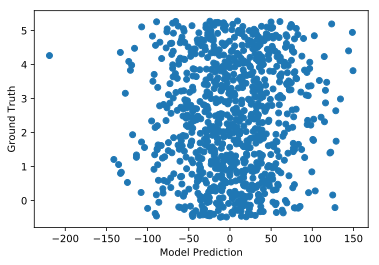

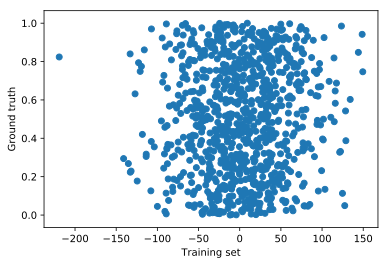

In [136]:
with tf.Session()as sech:
  sech.run(init)
  
  for i in range(200):
    
    for x, y in zip(train_x, y_train):
      
      sech.run(optimizer, feed_dict = {X:x, Y:y})
    if i % 20 == 0:
      c = sech.run (cost, feed_dict={X: train_x, Y: y_train})
      w = sech.run(W)
      b = sech.run(B)
      print(f'train error in epoch: {i:04d} c = {c:.4f} w={w:.4f} b={b:.4f}')
  for x, y in zip(x_test, y_test):
      
    sech.run(optimizer, feed_dict = {X:x, Y:y})
  test_error = sech.run (cost, feed_dict={X: train_x, Y: y_train})
  print("the Test error is",test_error)
  weight = sech.run(W)
  bias = sech.run(B)
  #plt.scatter(y_train,pred,)
  plt.scatter(y_train,weight*train_x+bias)
  
  plt.ylabel("Ground Truth")
  plt.xlabel("Model Prediction")
  plt.show()
  plt.scatter(y_train, train_x)
  plt.xlabel("Training set")
  plt.ylabel("Ground truth")
  plt.show()
       
        
